In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from datetime import datetime
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
inspector = inspect(engine)

In [7]:
inspector.get_table_names()

['measurement', 'station']

In [8]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results 
engine.execute('SELECT date, prcp FROM Measurement ORDER BY date DESC LIMIT 5000').fetchall()

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

![precipitation](Images/precipitation.png)

In [16]:
# Calculate the date 1 year ago from the last data point in the database
date_latest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
date_latest_list = [int(i) for i in date_latest.split("-")]
date_thold_1yr = dt.date(*date_latest_list) - dt.timedelta(days=365)
print(f'The date 1 year ago from the last data point" is {date_thold_1yr}.')

The date 1 year ago from the last data point" is 2016-08-23.


In [17]:
# Perform a query to retrieve the data and precipitation scores
date_prcp_list = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=date_thold_1yr.strftime('%Y-%m-%d')).order_by(Measurement.date).all()
list_date=[i[0] for i in date_prcp_list]
list_prcp=[i[1] for i in date_prcp_list]

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame({"Date":list_date,"prcp":list_prcp}).set_index("Date")

In [19]:
# Sort the dataframe by date
df = df.sort_values(by="Date").dropna()
df.head()

,prcp
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


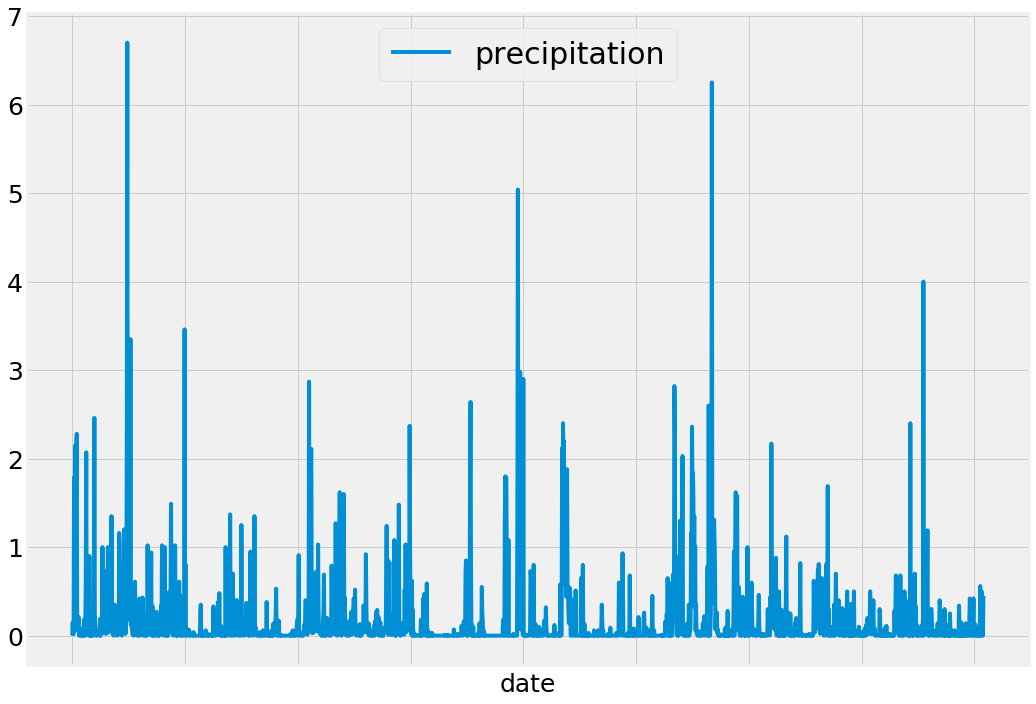

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = np.arange(len(df))
ax = df.plot(kind='line',figsize=(16,12))
plt.grid(True)
plt.xlabel("date", fontsize= 25)
plt.legend(["precipitation"],loc="upper center", fontsize= 30)
plt.yticks(fontsize=25)
plt.savefig('Precipitation.png', dpi=300)
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

![describe](Images/describe.png)

In [22]:
# Design a query to show how many stations are available in this dataset?
weather_stations = session.query(Station.station).count()
print(weather_stations)
print(f"There are {weather_stations} stations in this dataset.")

9
There are 9 stations in this dataset.


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print(f"The most active stations is {station_count[0][0]}.")
station_count

The most active stations is USC00519281.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Choose the station with the highest number of temperature observations.
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
tem_expl = session.query(*sel).\
                  filter(Measurement.station==station_count[0][0]).all()
tem_expl

[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tem_list = session.query(Measurement.tobs).filter(Measurement.station== station_count[0][0]).\
            filter(Measurement.date>= date_thold_1yr.strftime('%Y-%m-%d')).order_by(Measurement.date).all()
tem_list = [i[0] for i in tem_list]

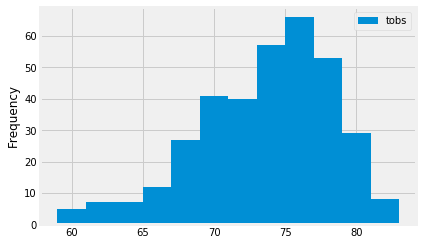

In [27]:
# plot the results as a histogram
plt.hist(tem_list,bins=12)
# Set legend and ylabel
plt.legend(["tobs"])
plt.ylabel("Frequency")
# Set grid
plt.grid(True)
#  Save plot
plt.savefig('Station Analysis.png')

![precipitation](Images/station-histogram.png)

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2017-04-14', '2017-04-21')

[(67.0, 72.70588235294117, 83.0)]

In [37]:
TMIN = calc_temps('2017-04-14', '2017-04-21')[0][0]
print(TMIN)

67.0


In [38]:
TMAX = calc_temps('2017-04-14', '2017-04-21')[0][2]
print(TMAX)

83.0


In [39]:
TAVG = calc_temps('2017-04-14', '2017-04-21')[0][1]
print(TAVG)

72.70588235294117


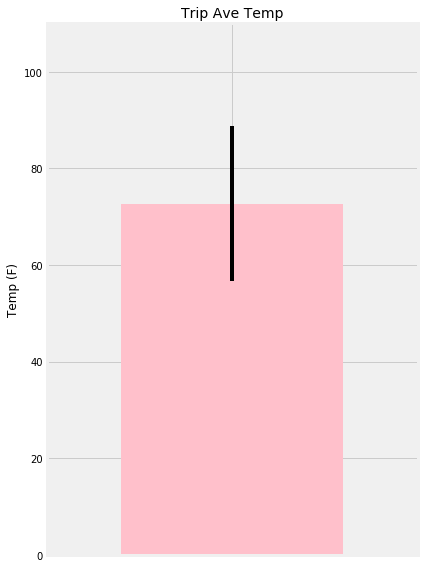

In [41]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(6,8))
plt.bar(1, TAVG,color = 'pink', yerr = TMAX-TMIN, align='center',tick_label="", width=1.2) 
plt.ylim(0,110)
plt.xlim(0,2)
plt.title(f"Trip Ave Temp", fontsize=14)
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.savefig('Trip Ave Temp.png')

plt.show()

In [43]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel= [Station.station,Station.name,Station.elevation, Station.longitude, Station.elevation,
                  func.sum(Measurement.prcp)]
rainfall_info = session.query(*sel).filter(Measurement.station == Station.station)\
                .filter(Measurement.date >= '2017-04-14')\
                .filter(Measurement.date <= '2017-04-21').group_by(Station.station)\
                .order_by(func.sum(Measurement.prcp).desc()).all()
print(rainfall_info)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 152.4, -157.8025, 152.4, 8.09), ('USC00519281', 'WAIHEE 837.5, HI US', 32.9, -157.84888999999998, 32.9, 8.029999999999998), ('USC00513117', 'KANEOHE 838.1, HI US', 14.6, -157.8015, 14.6, 3.63), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 19.5, -157.71139, 19.5, 3.5199999999999996), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 7.0, -157.8374, 7.0, 1.46), ('USC00519397', 'WAIKIKI 717.2, HI US', 3.0, -157.8168, 3.0, 0.5900000000000001), ('USC00517948', 'PEARL CITY, HI US', 11.9, -157.9751, 11.9, 0.0)]


## Optional Challenge Assignment

In [44]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [35]:
# Plot the daily normals as an area plot with `stacked=False`
